# Relatório com as principais estatísticas do banco de dados
Candidato: Pedro Araújo Pietrafesa

Utilizando as variáveis (features), faça um relatório com uma análise das principais estatísticas da base de dados. Descreva graficamente essas variáveis (features), apresentando as suas principais estatísticas descritivas. Comente o porquê da escolha destas estatísticas e o que elas nos informam.

# Bibliotecas 

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statistics

import sklearn.neighbors._base # this is from `scikit-learn` instead of `sklearn`
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest # remember to put this after sys.modules

# Baixando o banco de dados
## Banco de treinamento 

A análise das principais estatísticas será realizada no banco de dados de treinamento. O exame das estatísticas observará não só os aspectos de tipologia, tais como dados numéricos ou qualitativos, mas também a distribuição de cada variável,bem como a existência de informações faltantes. 

In [321]:
treino = pd.read_csv('https://raw.githubusercontent.com/pedropietrafesa/lighthouse_desafio/main/cars_train.csv')


In [322]:
treino.head(5)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389


In [319]:
teste = pd.read_csv('https://raw.githubusercontent.com/pedropietrafesa/lighthouse_desafio/main/cars_test.csv')

In [320]:
teste.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021,20258,Manual,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021,53045,Manual,2,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.0,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019,32486,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.0,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020,24937,Automática,4,...,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.0,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019,62074,Automática,4,...,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


# Compreendendo os dados 

Para a compreensão dos dados que serão trabalhados é necessário obter as informações sobre como os dados foram tabulados no dataset. O comando .info() descreve a tipologia da variável e quantos valores não nulos em cada coluna. 

In [157]:
pd.set_option('display.max_row', 100)

In [257]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

O _output_ mostra que o conjunto de dados é formado por 29 variáveis e 29.584 observações, sendo, a princípio, 22 qualitativas e 7 quantitativas. As variáveis "ano_de_fabricacao" e "ano_modelo" estão como numéricas devido a forma de tabulação, contudo, nesta etapa das análises serão transformadas em qualitativa, no formato _object_ para melhor compreensão dos seus respectivos comportamentos. Posteriormente, caso seja necessário, para uso de técnicas de aprendizado de máquina como _Random Forest_, as duas variáveis retornarão ao formato numérico.

É possível verificar que algumas variáveis possuem dados faltantes. A variável "veiculo_alienado", por exemplo, não tem informação inserida. Para ter visão mais precisa, a tabela a seguir apresenta a soma de linhas sem informações por variável.

In [136]:
print(" \n Total de dados faltantes em cada coluna do dataset de treino: \n\n",
      treino.isnull().sum().sort_values(ascending = False))

 
 Total de dados faltantes em cada coluna do dataset: 

 veiculo_alienado           29584
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
revisoes_concessionaria    20412
veiculo_único_dono         19161
veiculo_licenciado         13678
ipva_pago                   9925
dono_aceita_troca           7662
num_fotos                    177
id                             0
estado_vendedor                0
elegivel_revisao               0
                           ...  
cor                            0
blindado                       0
tipo                           0
num_portas                     0
cambio                         0
hodometro                      0
ano_modelo                     0
ano_de_fabricacao              0
versao                         0
modelo                         0
marca                          0
preco                          0
Length: 29, dtype: int64


<AxesSubplot:>

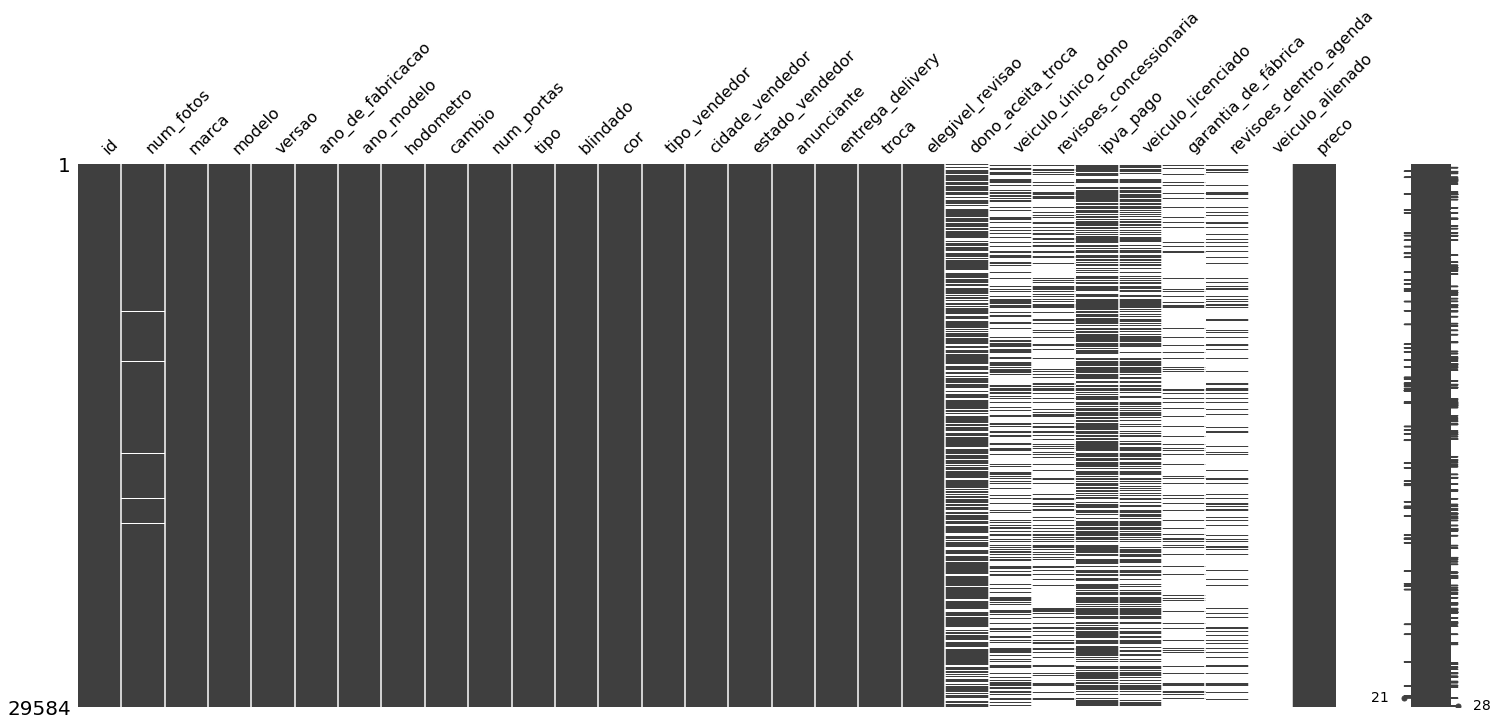

In [134]:
msno.matrix(treino)

In [145]:
print(treino.dono_aceita_troca.value_counts(), "\n" ,treino.veiculo_único_dono.value_counts(), "\n",
     treino.revisoes_concessionaria.value_counts(), "\n" ,treino.ipva_pago.value_counts(), "\n" ,
     treino.veiculo_licenciado.value_counts(), "\n" ,treino.garantia_de_fábrica.value_counts(), "\n" ,
     treino.revisoes_dentro_agenda.value_counts(), "\n",treino.troca.value_counts(),"\n" )

Aceita troca    21922
Name: dono_aceita_troca, dtype: int64 
 Único dono    10423
Name: veiculo_único_dono, dtype: int64 
 Todas as revisões feitas pela concessionária    9172
Name: revisoes_concessionaria, dtype: int64 
 IPVA pago    19659
Name: ipva_pago, dtype: int64 
 Licenciado    15906
Name: veiculo_licenciado, dtype: int64 
 Garantia de fábrica    4365
Name: garantia_de_fábrica, dtype: int64 
 Todas as revisões feitas pela agenda do carro    5910
Name: revisoes_dentro_agenda, dtype: int64 
 False    24523
True      5061
Name: troca, dtype: int64 



Analisando as variáveis que apresentaram valores faltantes, verificou-se a existência de nove _features_ com dados faltantes, sendo oito categorícas e uma numérica. Das variáveis categóricas o banco de dados não deixa claro se a não presença de valor na casela significa o não evento.

Por exemplo, na variável "dono_aceita_troca", há 7662 caselas em branco. Isto significa que, nos locais onde não há preenchimento, o dono não aceita troca? Ou na tabulação da informação houve um erro técnico e deixou em branco para aquela observação?

Os questionamentos são justificáveis, pois na variável "troca", que mensura se o veículo já foi trocado anteriormente e não tem valores faltantes, há o preenchimento das duas categorias. 

Esta é uma questão para se perguntar a empresa de marketplace, pois vai influenciar na análise dos dados. A equipe de cientistas de dados pode sugerir a inserção de informações referentes aos não eventos. 

Vamos analisar a estrutura dos dados de teste.

In [139]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       9862 non-null   object 
 1   num_fotos                9802 non-null   float64
 2   marca                    9862 non-null   object 
 3   modelo                   9862 non-null   object 
 4   versao                   9862 non-null   object 
 5   ano_de_fabricacao        9862 non-null   int64  
 6   ano_modelo               9862 non-null   int64  
 7   hodometro                9862 non-null   int64  
 8   cambio                   9862 non-null   object 
 9   num_portas               9862 non-null   int64  
 10  tipo                     9862 non-null   object 
 11  blindado                 9862 non-null   object 
 12  cor                      9862 non-null   object 
 13  tipo_vendedor            9862 non-null   object 
 14  cidade_vendedor         

In [140]:
print(" \n Total de dados faltantes em cada coluna do dataset de teste: \n\n",
      teste.isnull().sum().sort_values(ascending = False))

 
 Total de dados faltantes em cada coluna do dataset de teste: 

 veiculo_alienado           9862
garantia_de_fábrica        8439
revisoes_dentro_agenda     7869
revisoes_concessionaria    6795
veiculo_único_dono         6387
veiculo_licenciado         4518
ipva_pago                  3298
dono_aceita_troca          2554
num_fotos                    60
elegivel_revisao              0
troca                         0
entrega_delivery              0
                           ... 
cor                           0
blindado                      0
tipo                          0
num_portas                    0
cambio                        0
hodometro                     0
ano_modelo                    0
ano_de_fabricacao             0
versao                        0
modelo                        0
marca                         0
cidade_vendedor               0
Length: 28, dtype: int64


<AxesSubplot:>

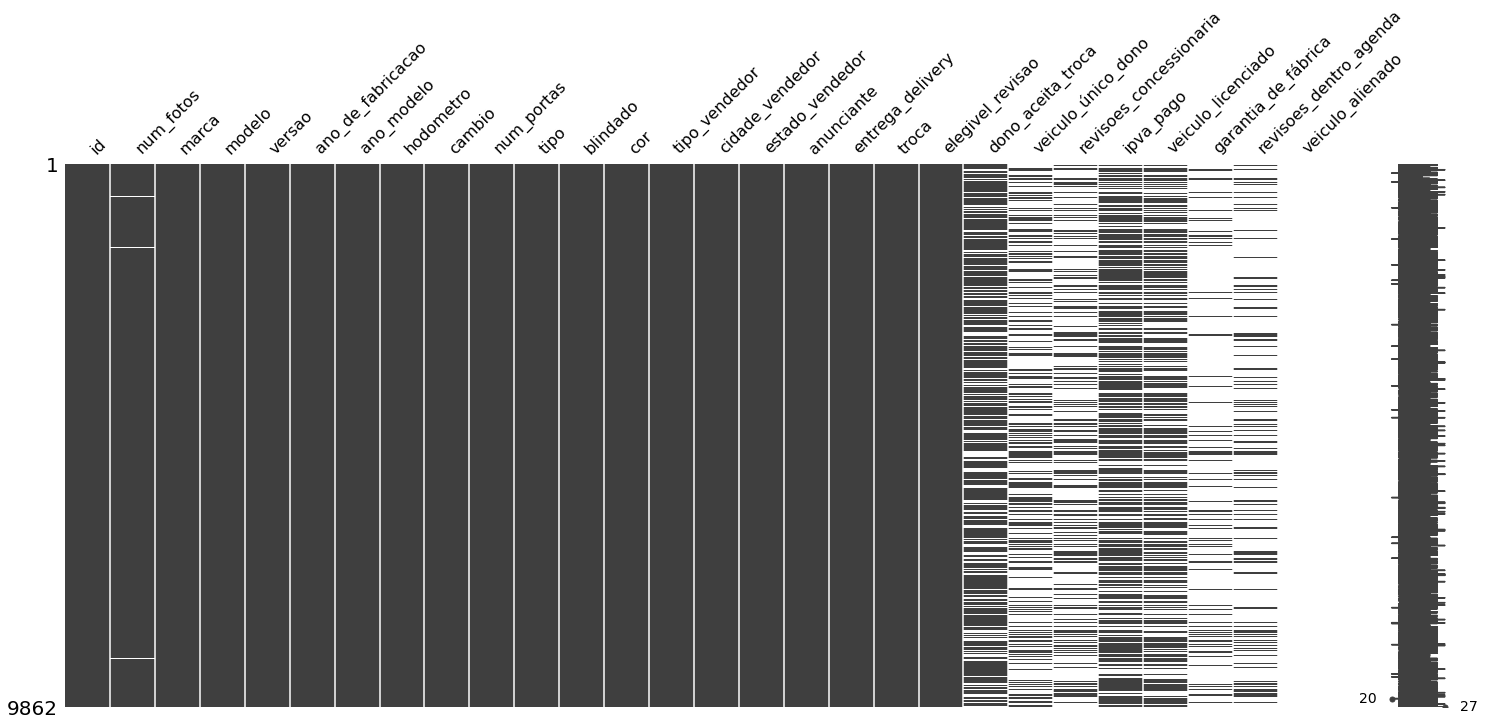

In [142]:
msno.matrix(teste)

É possivel observar que na base de dados de teste o mesmo padrão de dados faltantes é encontrado em relação a base de treinamento.

De acordo com Emmanuel et al. (2021), a gravidade dos valores faltantes depende em parte da quantidade de dados ausentes, do padrão dos dados ausentes e do mecanismo subjacente à falta de dados. O que pode ocasionar diferentes problemas, como diminuição do desempenho da modelagem e resultados tendenciosos. No estudo realizado pelos autores com os bancos de dados Iris e _novel power plant fan_, disponíveis no repositório _UCI Machine Learning_, verificou-se que os métodos _k nearest neighbor_(KNN) e o _missForest_ tiveram bons resultados em lidar com valores faltantes com o nível de até 20% de _missing values_. 

Assim, na etapa de construção do modelo de predição, as variáveis acima do percentual de 20% não serão utilizadas. São elas: 
* dono_aceita_troca;
* veiculo_único_dono;
* revisoes_concessionaria;
* ipva_pago;
* veiculo_licenciado;
* garantia_de_fábrica;
* revisoes_dentro_agenda;
* veiculo_alienado.

Essas variáveis seriam importantes na precificação dos veículos, uma vez que apresentam o comportamento dos seus respectivos condutores.

A variável "num_fotos" teve 0,599% de dados faltantes na base de treino. Neste caso, será realizada análise na etapa de EDA para verificar o grau de correlação dessa variável com a _target_ (variável resposta) para concluir se é o caso de imputação de dados, ou não. Sendo necessário, será empreendida a técnica de aprendizado de máquina denominada _missForest_.  


https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00516-9


## Principais estatísticas das variáveis _features_ 

O objetivo do analista quando se estuda uma variável é conhecer o seu comportamento, analisando a ocorrência de suas possíveis realizações. Para realizar a análise das variáveis explicativas (_features_), vamos dividir em duas subseções, uma para descrever as variáveis categóricas e a outra as numéricas. 

### Variáveis Categóricas

No que diz respeito as variáveis categóricas, as distribuições de frequência serão o principal recurso  para resumir cada variável. Nesse sentido e vamos trabalhar com tabela de ferquência, gráfico de barras. A tabela de frequência e o gráfico de barras nos informam a ocorrência de cada valor ou intervalo de valor da variável.

A apresentação das ferramentas de resumo será feita de acordo com a ordem em que as variáveis categóricas estão no banco de dados.




 #### Marca

In [227]:
pd.DataFrame(treino['marca'].value_counts(dropna = False))


,marca
VOLKSWAGEN,4594
CHEVROLET,3020
TOYOTA,2180
HYUNDAI,2043
JEEP,2000
FIAT,1918
BMW,1784
AUDI,1698
PEUGEOT,1675
HONDA,1586


Text(0, 0.5, 'Frequência')

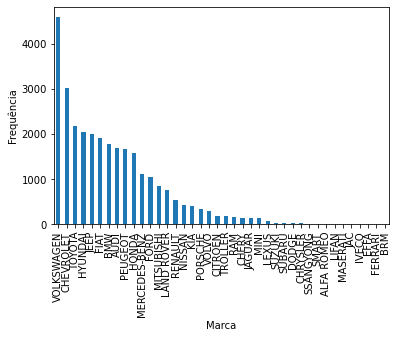

In [179]:
treino['marca'].value_counts().plot(kind = 'bar')
plt.xlabel('Marca')
plt.ylabel('Frequência')

In [155]:
statistics.mode(treino['marca'])

'VOLKSWAGEN'

Há 40 marcas de carros diferentes no dataset, sendo a que tem o maior número de carros a venda é a Volkswagen. Com o número de categorias nesta variável, para a modelagem será necessário realizar transformação no dados, agrupando as marcas por meio de algum critério que será especificado na etapa da EDA.

#### Modelo

In [226]:
pd.DataFrame(treino['modelo'].value_counts(dropna = False))

,modelo
COMPASS,1480
2008,1431
Q3,914
TORO,902
COROLLA,867
...,...
X-TRAIL,1
QUATTROPORTE,1
ES,1
S4,1


No banco de dados são 457 modelos de carro anunciados. Os cinco modelos mais citados nos anuncios são, respectivamente, das marcas Jeep, Peugeot, Audi, Fiat e Toyota. Essas marcas estão entre as dez mais anunciadas, sendo o Compass da Jeep com maior frequência.

#### Versão

In [312]:
pd.DataFrame(treino['versao'].value_counts(dropna = False))


,versao
1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,1352
2.0 16V FLEX LIMITED AUTOMÁTICO,1032
2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,757
1.0 200 TSI COMFORTLINE AUTOMÁTICO,466
2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO,429
...,...
1.0 SV 12V FLEX 4P MANUAL,1
1.5 i-VTEC FLEX TOURING CVT,1
1.6 SE SEDAN 16V FLEX 4P MANUAL,1
1.0 EX 12V GASOLINA 4P AUTOMÁTICO,1


A variável "versao" possui 1916 subcategorias, a mais frequênte é a "1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO" que pode ser encontrada nos carros 208 e 2008 da Peugoet.  

#### Variáveis referentes aos anos de fabricação do carro e do modelo

Estas variáveis foram inseridas no banco de dados como numéricas. Apesar do tipo de codificação, elas trazer uma perspectiva de qualificação, no caso ano de fabricação do carro ou do modelo. Desta forma, para efeitos de conhecimento do dataset, vamos transformá-las para o tipo objeto. Na proposição do modelo de precificação trabalharemos como _integer_.

In [291]:
treino['ano_de_fabricacao'] = treino['ano_de_fabricacao'].astype(object)
treino['ano_modelo'] = treino['ano_modelo'].astype(object)

##### Ano de Fabricação

In [264]:
#df.team.value_counts()[df.team.unique()]

af = pd.DataFrame(treino['ano_de_fabricacao'].value_counts(dropna = False))
af = af.sort_index(ascending=False)
af

,ano_de_fabricacao
2022,37
2021,2614
2020,4729
2019,3880
2018,3820
2017,4369
2016,1822
2015,1753
2014,2221
2013,2443


Text(0, 0.5, 'Frequência')

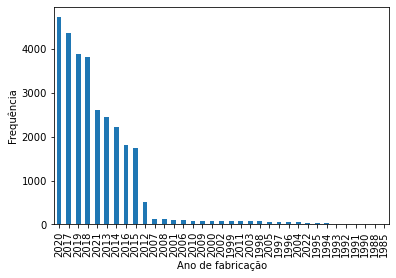

In [268]:
treino['ano_de_fabricacao'].value_counts().plot(kind = 'bar')
plt.xlabel('Ano de fabricação')
plt.ylabel('Frequência')

Os carros com ano de fabricação em 2020 foi o mais frenquente. Há uma concentração de carros entre 2012 a 2021. Contudo, o banco de dados apresentou anuncios de carros até 1985, ou seja, existe no mercado de carros usados, veículos com mais de 35 anos de fabricação.

##### Ano do Modelo

In [269]:
an = pd.DataFrame(treino['ano_modelo'].value_counts(dropna = False))
an = an.sort_index(ascending=False)
an

,ano_modelo
2023,15
2022,829
2021,5071
2020,3541
2019,3587
2018,4221
2017,4519
2016,890
2015,2386
2014,2377


Text(0, 0.5, 'Frequência')

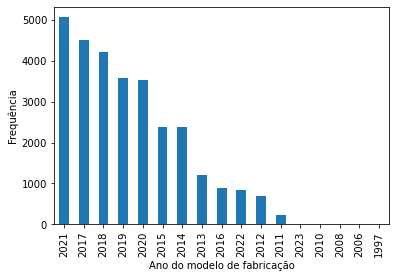

In [282]:
treino['ano_modelo'].value_counts().plot(kind = 'bar')
plt.xlabel('Ano do modelo de fabricação')
plt.ylabel('Frequência')

Chama atenção na variável do ano do modelo de fabricação do carro o fato de determinados carros serem fabricados num certo ano e o modelo ser registrado como referente a 8 ou mais anos depois da fabricação. Exemplo desta ocorrência está na linha 7819.
Verifica-se que os anuncios mais frequentes são de carros com modelo de fabricação de 2021.

#### Câmbio

In [222]:
pd.DataFrame(treino['cambio'].value_counts(dropna = False))


,cambio
Automática,22545
Manual,4989
CVT,1792
Automatizada,139
Automatizada DCT,53
Semi-automática,41
Automática Sequencial,25


Text(0, 0.5, 'Frequência')

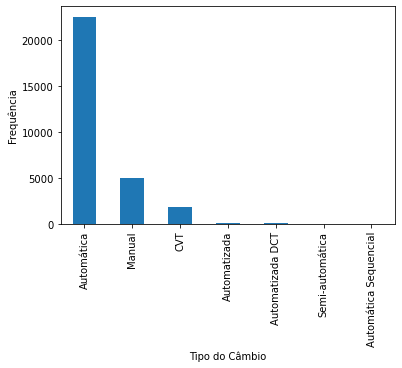

In [181]:
treino['cambio'].value_counts().plot(kind = 'bar')
plt.xlabel('Tipo do Câmbio')
plt.ylabel('Frequência')

São sete os tipos de câmbios dos carros anunciados na base de dados, o automático é o mais frequente, seguido, com muita distância, do manual.  

#### Tipo do veículo anunciado

In [221]:
pd.DataFrame(treino['tipo'].value_counts(dropna = False))


,tipo
Sedã,16429
Hatchback,4924
Picape,4849
Utilitário esportivo,3322
Perua/SW,27
Cupê,26
Minivan,7


Text(0, 0.5, 'Frequência')

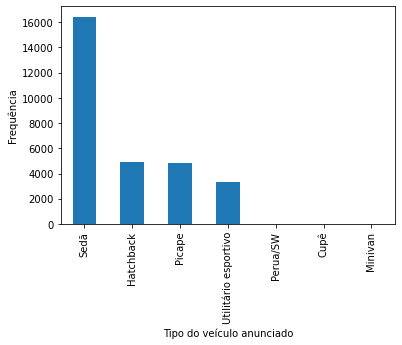

In [281]:
treino['tipo'].value_counts().plot(kind = 'bar')
plt.xlabel('Tipo do veículo anunciado')
plt.ylabel('Frequência')

O sedã corresponde ao tipo de carro mais anunciado na base de dados, sendo o Corolla o modelo de sedã mais citado. 

#### Blindado

In [220]:
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
treino.loc[ treino["blindado"] == "N", "blindado"] = "Não"
treino.loc[ treino["blindado"] == "S", "blindado"] = "Sim"
pd.DataFrame(treino['blindado'].value_counts(dropna = False))

,blindado
Não,29336
Sim,248


Text(0, 0.5, 'Frequência')

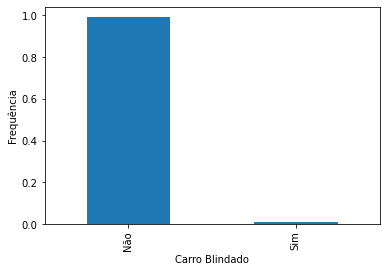

In [198]:
treino['blindado'].value_counts().plot(kind = 'bar')
plt.xlabel('Carro Blindado')
plt.ylabel('Frequência')

Dos carros anunciados no banco de dados 99% não são blindados.

#### Cor do Carro

In [219]:
pd.DataFrame(treino['cor'].value_counts(dropna = False))


,cor
Branco,20949
Preto,5256
Prata,1741
Cinza,1634
Dourado,2
Verde,1
Vermelho,1


Text(0, 0.5, 'Frequência')

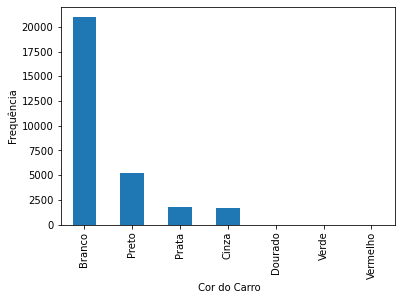

In [202]:
treino['cor'].value_counts().plot(kind = 'bar')
plt.xlabel(' Cor do Carro')
plt.ylabel('Frequência')

A cor branca é predominante entre os carros anunciados, cerca de 70% são brancos. De cor preta são outros 17%. Prata e cinza correspondem a 5 % cada um. 

#### Tipo de Vendedor

In [218]:
pd.DataFrame(treino['tipo_vendedor'].value_counts(dropna = False))


,tipo_vendedor
PF,17926
PJ,11658


Text(0, 0.5, 'Frequência')

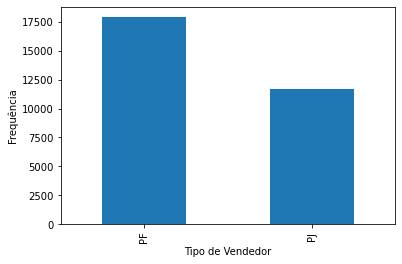

In [208]:
treino['tipo_vendedor'].value_counts().plot(kind = 'bar')
plt.xlabel('Tipo de Vendedor')
plt.ylabel('Frequência')

A mioria dos vendedores de carros anunciados no banco de dados são pessoas físicas, 60%.

#### Cidade de residência do vendedor

In [217]:
pd.DataFrame(treino['cidade_vendedor'].value_counts(dropna = False))

,cidade_vendedor
São Paulo,6158
Rio de Janeiro,5793
Belo Horizonte,2172
Presidente Prudente,1536
Goiânia,1396
...,...
Garopaba,1
Porto Feliz,1
Antônio Carlos,1
Panambi,1


Os anuncios estão distribuídos em 575 cidades do Brasil. São Paulo é o município com maior número de anuncios, seguido por Rio de Janeiro e Belo Horizonte. Entre as cinco cidades com mais anuncios, apenas Goiânia está fora da região sudeste. 

#### Estado do Vendedor

In [215]:
pd.DataFrame(treino['estado_vendedor'].value_counts(dropna = False))


,estado_vendedor
São Paulo (SP),16378
Rio de Janeiro (RJ),2548
Paraná (PR),2526
Santa Catarina (SC),2302
Minas Gerais (MG),1775
Rio Grande do Sul (RS),1646
Goiás (GO),789
Bahia (BA),604
Pernambuco (PE),318
Alagoas (AL),125


Text(0, 0.5, 'Frequência')

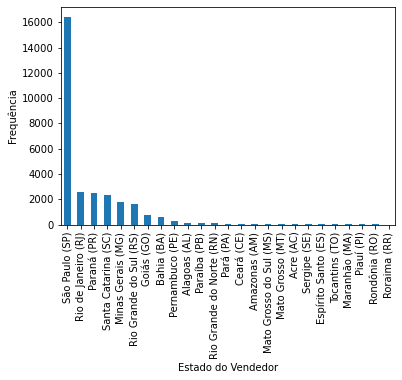

In [211]:
treino['estado_vendedor'].value_counts().plot(kind = 'bar')
plt.xlabel('Estado do Vendedor')
plt.ylabel('Frequência')

Dois pontos chamam atenção na característica da variável. O primeiro, o estado de São Paulo concentrou as ocorrências dos anuncios. O segundo, observando os numéros da variável do estado do vendedor com o da cidade do vendedor foi possível verificar inconsistência no banco de dados. A frequencia de vendedores que moram em algumas cidades de determinados estados é maior do que a quantidade estadual. Dois exemplos, a cidade de Goiânia tem mais observações do que o estado de Goiás. O mesmo ocorre com Belo Horizonte e Minas Gerais. 

#### Tipo de anunciante do vendedor do veículo

In [230]:
pd.DataFrame(treino['anunciante'].value_counts(dropna = False)

,anunciante
Pessoa Física,0.608403
Loja,0.333931
Concessionária,0.057531
Acessórios e serviços para autos,0.000135


Text(0, 0.5, 'Frequência')

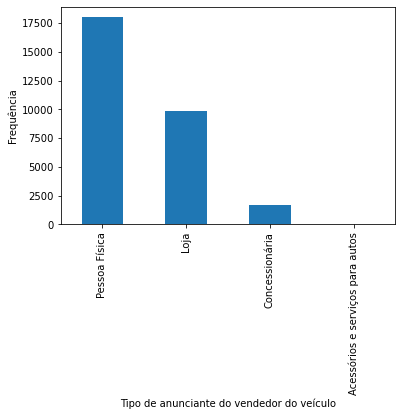

In [229]:
treino['anunciante'].value_counts().plot(kind = 'bar')
plt.xlabel('Tipo de anunciante do vendedor do veículo')
plt.ylabel('Frequência')

Assim como o tipo de vendedor, o anunciante do veículo é em sua maioria pessoa física. Lojas de carros estão em segundo lugar e as concessionárias em terceiro. 

####  O vendedor faz ou não delivery do veículo anunciado

In [316]:
treino.loc[ treino["entrega_delivery"] == False, "entrega_delivery"] = "Não"
treino.loc[ treino["entrega_delivery"] == True, "entrega_delivery"] = "Sim"
pd.DataFrame(treino['entrega_delivery'].value_counts(dropna = False))

,entrega_delivery
Não,23601
Sim,5983


Text(0, 0.5, 'Frequência')

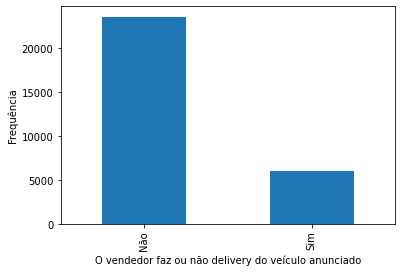

In [235]:
treino['entrega_delivery'].value_counts().plot(kind = 'bar')
plt.xlabel('O vendedor faz ou não delivery do veículo anunciado')
plt.ylabel('Frequência')

Normalmente os vendedores dos carros não realizam a entrega do carro anunciado caso seja vendido. Apenas 20% dos vendedores fazem esse tipo de serviço. 

#### Veículo anunciado já foi trocado anteriormente

In [318]:
treino.loc[ treino["troca"] == False, "troca"] = "Não"
treino.loc[ treino["troca"] == True, "troca"] = "Sim"
pd.DataFrame(treino['troca'].value_counts(dropna = False))


,troca
Não,24523
Sim,5061


Text(0, 0.5, 'Frequência')

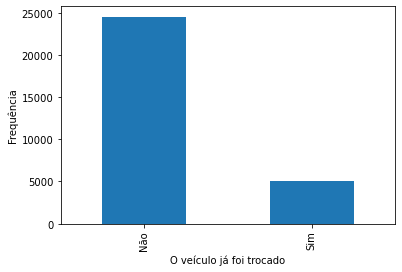

In [238]:
tro = treino['troca'].value_counts().plot(kind = 'bar')
plt.xlabel('O veículo já foi trocado')
plt.ylabel('Frequência')

Dos veículos que estão no banco de dados 80% não foram trocados antes dos anuncios serem vinculados. 

#### O veículo anunciado precisa ou não de revisão

In [314]:
treino.loc[ treino["elegivel_revisao"] == False, "elegivel_revisao"] = "Não"
treino.loc[ treino["elegivel_revisao"] == True, "elegivel_revisao"] = "Sim"
pd.DataFrame(treino['elegivel_revisao'].value_counts(dropna = False, normalize = True))

,elegivel_revisao
Não,1.0


Text(0, 0.5, 'Frequência')

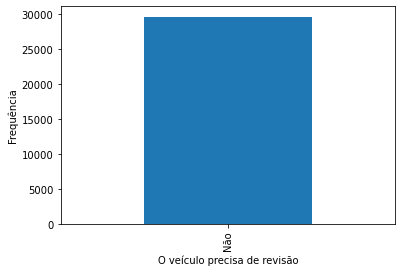

In [279]:
treino['elegivel_revisao'].value_counts().plot(kind = 'bar')
plt.xlabel('O veículo precisa de revisão')
plt.ylabel('Frequência')

De acordo com a variável, nenhum carro anunciado do banco de dados precisa de revisão. Como essa variável não apresentou variabilidade é uma forte candidata a ser excluída do modelo de precificação de carros.

#### Variáveis com dados faltantes e que não possuem o não evento 

No caso dessas variáveis só há registro de frequência dos eventos. 

##### O vendedor aceita ou não realizar uma troca com o veículo anunciado

In [274]:
pd.DataFrame(treino['dono_aceita_troca'].value_counts(dropna = False))

,dono_aceita_troca
Aceita troca,21922
NaN,7662


#####  O veículo anunciado é de um único dono

In [283]:
pd.DataFrame(treino['veiculo_único_dono'].value_counts(dropna = False))

,veiculo_único_dono
NaN,19161
Único dono,10423


##### O veículo anunciado teve suas revisões feitas em concessionárias

In [284]:
pd.DataFrame(treino['revisoes_concessionaria'].value_counts(dropna = False))

,revisoes_concessionaria
NaN,20412
Todas as revisões feitas pela concessionária,9172


##### O veículo anunciado está com o IPVA pago ou não

In [285]:
pd.DataFrame(treino['ipva_pago'].value_counts(dropna = False))

,ipva_pago
IPVA pago,19659
NaN,9925


##### O veículo anunciado está com o licenciamento pago ou não

In [286]:
pd.DataFrame(treino['veiculo_licenciado'].value_counts(dropna = False))

,veiculo_licenciado
Licenciado,15906
NaN,13678


##### O veículo anunciado possui garantia de fábrica ou não

In [287]:
pd.DataFrame(treino['garantia_de_fábrica'].value_counts(dropna = False))

,garantia_de_fábrica
NaN,25219
Garantia de fábrica,4365


##### As revisões feitas do veículo anunciado foram realizadas dentro da agenda prevista

In [288]:
pd.DataFrame(treino['revisoes_dentro_agenda'].value_counts(dropna = False))

,revisoes_dentro_agenda
NaN,23674
Todas as revisões feitas pela agenda do carro,5910


##### O veículo anunciado está alienado ou não

In [289]:
pd.DataFrame(treino['veiculo_alienado'].value_counts(dropna = False))

,veiculo_alienado
NaN,29584


### Variáveis Numéricas

Para as variáveis numéricas serão apresentadas as medidas de tendência central e de dispersão bem como histogramas e boxplots para verificarmos como estão distribuídos os dados. Num primeiro momento é exposto quadro resumo com as medidas de tendência central. No segundo momento, os gráficos que indicam as distribuições de cada variável.

#### Quadro resumo das variáveis numéricas

In [313]:
treino['veiculo_alienado'] = treino['veiculo_alienado'].astype(object)

In [294]:
treino.describe()

,num_fotos,hodometro,num_portas,preco
count,29407.000000,29584.000000,29584.000000,2.958400e+04
mean,10.323834,58430.592077,3.940677,1.330239e+05
std,3.487334,32561.769309,0.338360,8.166287e+04
min,8.000000,100.000000,2.000000,9.869951e+03
25%,8.000000,31214.000000,4.000000,7.657177e+04
50%,8.000000,57434.000000,4.000000,1.143558e+05
75%,14.000000,81953.500000,4.000000,1.636796e+05
max,21.000000,390065.000000,4.000000,1.359813e+06


Acerca das características dos carros a média de quilometragem dos veículos a venda foi de 58430.59km rodados. A variação da quilometragem foi alta, de 32561.77. Para vender os carros, os anunciantes publicam em média 10 fotos. 

#### Número de fotos

<AxesSubplot:xlabel='num_fotos'>

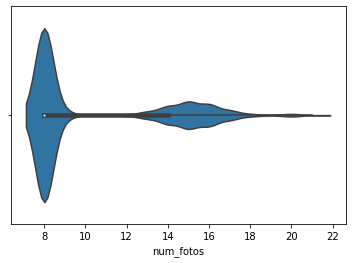

In [301]:
sns.violinplot(x=treino["num_fotos"])

/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


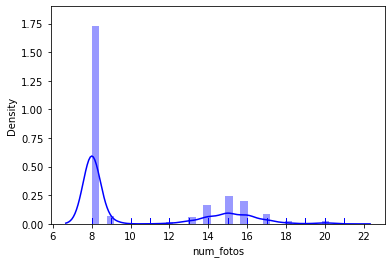

In [304]:
sns.distplot(treino["num_fotos"], 
             hist=True, 
             rug=True, 
             color="b")
plt.show()

Como pode ser observado dos gráficos, há concentração de dados no entorno de 8 fotos que os anunciantes colocam nos meios de divulgação dos carros.  

####  Valor registrado no hodômetro do veículo anunciado

<AxesSubplot:xlabel='hodometro'>

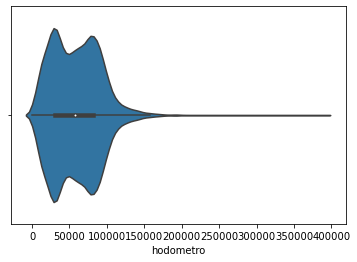

In [305]:
sns.violinplot(x=treino["hodometro"])

/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


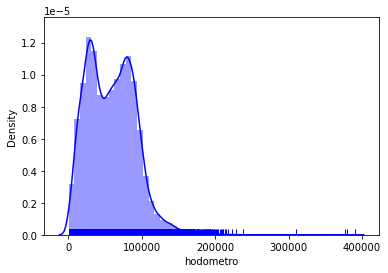

In [306]:
sns.distplot(treino["hodometro"], 
             hist=True, 
             rug=True, 
             color="b")
plt.show()

A quilometragem dos carros a venda no banco de dados está concentrado entre o intervalo de 100 a 150 mil kilometros. Nota-se no no histograma a existência de outliers próximos de 400 mil Kilometros. 

#### Número de Portas

<AxesSubplot:xlabel='num_portas'>

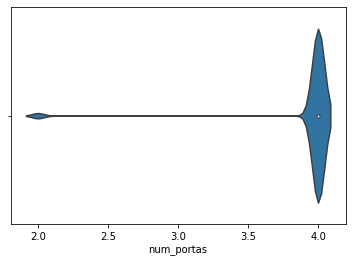

In [307]:
sns.violinplot(x=treino["num_portas"])

/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


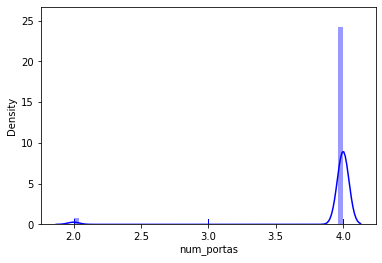

In [308]:
sns.distplot(treino["num_portas"], 
             hist=True, 
             rug=True, 
             color="b")
plt.show()

In [295]:
pd.DataFrame(treino['num_portas'].value_counts(dropna = False))

,num_portas
4,28697
2,868
3,19


A variável número de portas poderia ser modificada e transformada em categórica. Ela foi registrada como numérica inteira, mas na prática indica mais a qualificação da estrutura do carro do que um dado de contagem. Dito isso, percebe-se a predominância de carros quatro portas sendo anunciados.

# Imputação de dados

Realizando a imputação dos dados na variável "num_fotos" e retirando do _dataset_ as variáveis com número percentagem acima de 25% de dados faltantes. 

In [113]:
# Cirando uma nova base de dados sem as variáveis com mais de 25% de dados faltantes
x = treino.drop(columns=['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago',
                      'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda',
                      'veiculo_alienado'], axis=1)


# Imputação dos dados

x1 = x[['num_fotos', 'num_portas']]

## Utilizando a técnica do missForest
imputer = MissForest()   
data = pd.DataFrame(imputer.fit_transform(x1))

### Reorganizando a base de dados
data = data.rename(columns={data.columns[0]: 'num_fotos',data.columns[1]: 'num_portas'})
x = x.drop(columns=['num_fotos'], axis=1)
d = data[["num_fotos"]]
x.insert(1, "num_fotos", d)

# Verifciando se todas as variáveis possuem as 29584 observações
x.info()